# Numerical Methods. Final Project.

Pablo Muñoz Haro A01222422. Juan Antonio Olvera Robles A01630359.

## Usage

This ipython notebook is viewable in the browser which also provides an interactive setting. The notebook assumes `python3` is available with the libraries `jupyter` (for the displaying of the notebook), `numpy` for simplifying vetor and matrix operations and `matplotlib` for reading and displaying images. It is suggested that you create a virtual environment for this project so that you do not pollute your system-wide installation of python with these dependencies. To use the virtual enviornment you do need to have the python `virtualenv` package installed system-wide, a typical usage would look like these:

```
pip install virtualenv # ensure virtualenv is installed
cd <dir-with-this-file>
virtualenv venv # Create virtual envrionment "venv" (this will create a directory with a new python install)
source ./venv/bin/activate # Activate the virtualenv
pip install -r requirements.txt # Install all the dependencies, listed in requirements.txt file
jupyter notebook # Open a browser tab with this notebook in interactive mode
```

To return to being able to use the system-wide installation of python run the command `deactivate` from your terminal.

Note that you only have to setup the virtualenvironment onece, if you wish to return to the notebook later you only have to start with the command ```source ./venv/bin/activate # Activate the virtualenv```

In [1]:
import numpy as np
from matplotlib import pyplot as plt, image as mpimg

In [2]:
# Program constants. Change these to modify the behaviour of the notebook.

# The path to the input image, assumed to have RGB channels
IMAGE_PATH = 'image01.jpg'

# The path where the black and white image will be saved
BW_IMAGE_PATH = 'image01bw.jpg'

# Method to convert the 3 RGB numbers (list) into a single number, we use the mean as the default strategy
# but you could choose something else like keeping the max of the three with np.max
GRAYIFY_STRATEGY = np.mean

In [3]:
img_data = mpimg.imread(IMAGE_PATH)

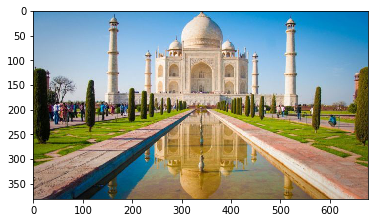

In [4]:
# Display the image to ensure it was read correctly
plt.imshow(img_data)

In [5]:
# A pixel of the image is a 3 number list, each number representing the intensity [0, 255] of a channel (RGB)
img_data[0,0] # pixel 0,0

array([ 62, 139, 191], dtype=uint8)

In [6]:
def grayify(img_data):
    '''
    IMG_DATA is a numpy.array representing an image.
    
    RETURNS a numpy.array of the same x and y dimensions as IMG_DATA, where each element is the "aggregation"
    of the corresponding 3 item element of IMG_DATA, according to GRAYIFY_STRATEGY global.
    '''
    num_cols, num_rows, num_channels = img_data.shape
    
    # Create a "clone" of the image but with only one channel,
    # all pixel values initialized to 0
    gray_img = np.zeros((num_cols, num_rows))
    
    # Visit each pixel, apply the grayify strategy and set the corresponding pixel in the black and white
    # image to the result
    for col_i in range(num_cols):
        for row_i in range(num_rows):
            gray_img[col_i, row_i] = GRAYIFY_STRATEGY(img_data[col_i, row_i])
            
    return gray_img

In [7]:
gray_img_data = grayify(img_data)

In [8]:
# Now a pixel of the gray image is a single scalar number
gray_img_data[0, 0]

130.66666666666666

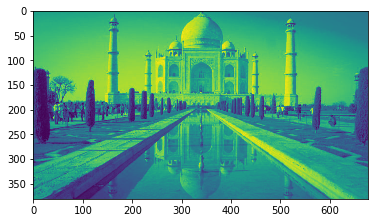

In [9]:
# Display the gray image to ensure the grayification process succeeded
plt.imshow(gray_img_data)

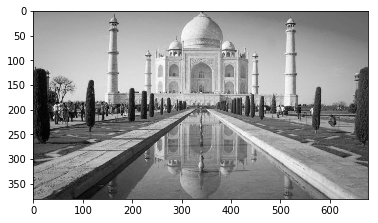

In [10]:
# Need to pass the cmap='gray' option to matplotlib.pyplot.imshow or else the colors are funky
plt.imshow(gray_img_data, cmap='gray')

In [11]:
# Save the grayified image
plt.imsave(fname=BW_IMAGE_PATH, arr=gray_img_data, cmap='gray')